This whole file is generated by ChatGPT :P

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

c:\Users\alanm\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset

In [24]:
# Load the CSV file
csv_path = 'faceDataset/faces.csv'
df = pd.read_csv(csv_path)

# Read the bounding box data
image_paths = df['image_name'].values
widths = df['width'].values
heights = df['height'].values
x0_values = df['x0'].values
y0_values = df['y0'].values
x1_values = df['x1'].values
y1_values = df['y1'].values

# Preprocess

In [25]:
# Initialize empty lists to store the preprocessed data
images = []
labels = []

# Iterate over the images
for i, image_path in enumerate(image_paths):
    # Read the image using OpenCV
    image = cv2.imread(os.path.join('faceDataset/images', image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    
    # Resize the image to a fixed size (e.g., 224x224)
    image = cv2.resize(image, (224, 224))
    x0_values[i] = x0_values[i] * 224 / widths[i]
    y0_values[i] = y0_values[i] * 224 / heights[i]
    x1_values[i] = x1_values[i] * 224 / widths[i]
    y1_values[i] = y1_values[i] * 224 / heights[i]
    
    # Normalize the image pixels to the range [0, 1]
    image = image.astype('float32') / 255.0
    
    # Append the preprocessed image to the list
    images.append(image)
    
    # Prepare the bounding box labels
    num_faces = len(x0_values[i]) if isinstance(x0_values[i], np.ndarray) else 1
    labels.append(np.array([[x0_values[i], y0_values[i], x1_values[i], y1_values[i]] for _ in range(num_faces)]))
    
# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Shuffle the dataset

In [26]:
# Shuffle the data
images, labels = shuffle(images, labels, random_state=42)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the model

In [27]:
# Build the model
model = models.Sequential()
model.add(layers.Input(shape=(224, 224, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))  # Output layer with 4 units (x0, y0, x1, y1)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model

In [28]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 37s 416ms/step - loss: 3304.2800 - val_loss: 1537.9310
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 34s 408ms/step - loss: 1470.0853 - val_loss: 1448.7665
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 34s 410ms/step - loss: 1417.4877 - val_loss: 1450.0018
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 414ms/step - loss: 1480.3541 - val_loss: 1441.2102
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 35s 416ms/step - loss: 1483.2104 - val_loss: 1600.4922


In [41]:
model.save('face_detection_model.keras')

# Load the model and continue training

In [34]:
# Load the saved model
loaded_model = load_model('face_detection_model.keras')

In [39]:
# Continue training the model
loaded_model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 31s 366ms/step - loss: 1448.7258 - val_loss: 1436.9174
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 34s 406ms/step - loss: 1425.3461 - val_loss: 1435.0481
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 426ms/step - loss: 1391.3456 - val_loss: 1415.3929
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 38s 454ms/step - loss: 1374.7247 - val_loss: 1432.9012
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 485ms/step - loss: 1361.1708 - val_loss: 1421.8407
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 48s 569ms/step - loss: 1350.5559 - val_loss: 1423.3585
Epoch 7/100
 1/84 ━━━━━━━━━━━━━━━━━━━━ 45s 551ms/step - loss: 1421.6770

KeyboardInterrupt: 

In [40]:
model = loaded_model

# Use the trained model to predict bounding boxes

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step


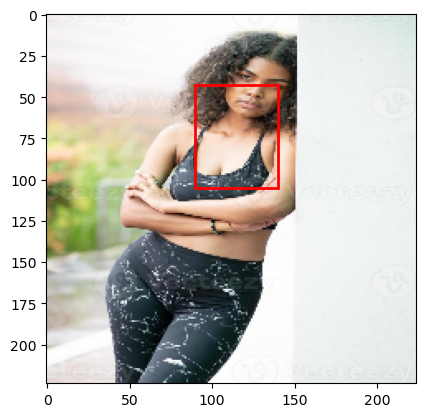

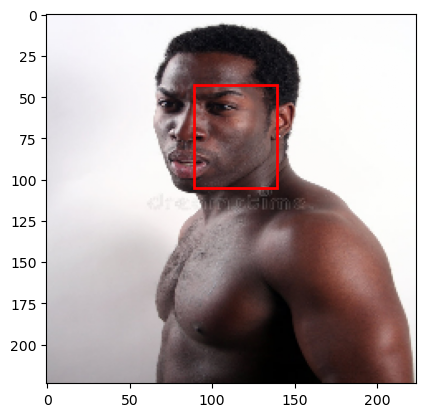

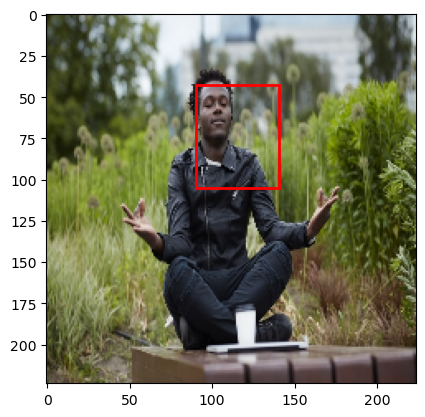

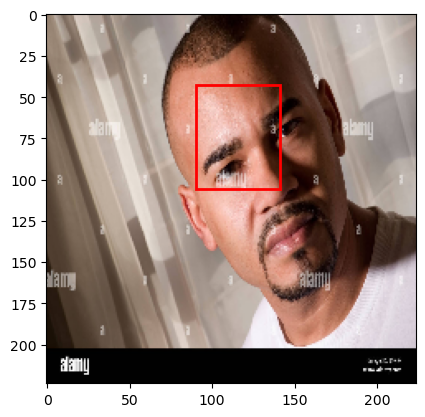

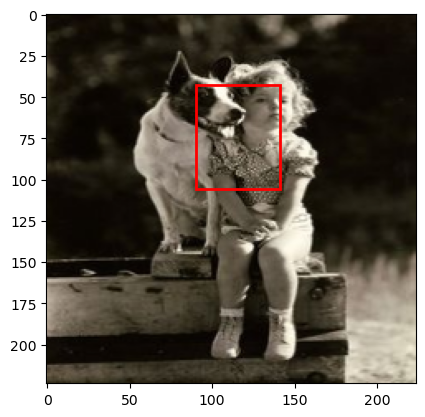

In [42]:
# Use the trained model to predict bounding boxes for test images
y_pred = model.predict(test_images)

for i in range(5):
    plt.imshow(test_images[i])
    x0 = y_pred[i][0]
    y0 = y_pred[i][1]
    x1 = y_pred[i][2]
    y1 = y_pred[i][3]
    plt.gca().add_patch(plt.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none'))
    plt.show()